In [1]:
# This cell is removed with the tag: "remove-input"
# As such, it will not be shown in documentation

#import warnings
#warnings.filterwarnings('ignore')

(Tutorial_Iterator)=
# Iterator

*Iterator over attributes of a molecular system*

MolSysMT includes a tool to iterate over attributes of a molecular system, topological or structural. This tool, the class {func}`molsysmt.basic.Iterator`, have common input arguments such as `start`, `stop`, `step` or `chunk`, no matter the nature of the attributes.

:::{hint}
Visit the section [User guide > Introduction > Molecular System > Attributes](../../intro/molecular_systems/attributes.ipynb) in case you are not familiar with the concept of "attribute" in MolSysMT.
:::

Let's start showing the use of the iterator over topological attributes.

## Iterations over topological attributes

Let's suppose we want to iterate over topological attributes of our molecular system such as `atom_name` or `group_index`. The class {func}`molsysmt.basic.Iterator` is our best ally.

```{admonition} API documentation
Follow this link for a detailed description of the input arguments, raised errors, and returned objects of this function:{class}`molsysmt.basic.Iterator`.
```

Have a look to the following code:

In [2]:
import molsysmt as msm

In [3]:
molecular_system = msm.systems.demo['chicken villin HP35']['1vii.mmtf']

In [4]:
iterator = msm.Iterator(molecular_system, selection='atom_name=="CA" and group_index<10',
                        atom_index=True, atom_name=True, group_index=True, group_name=True)

:::{tip}
All objects defined in the {ref}`molsysmt.basic <API basic>` module can be invoked also from the main level of the library. Hence, {class}`molsysmt.Iterator` is the same class as {class}`molsysmt.basic.Iterator`.
:::

In [5]:
for atom_index, atom_name, group_index, group_name in iterator:
    print(atom_index, atom_name, group_index, group_name)

1 CA 0 MET
20 CA 1 LEU
39 CA 2 SER
50 CA 3 ASP
62 CA 4 GLU
77 CA 5 ASP
89 CA 6 PHE
109 CA 7 LYS
131 CA 8 ALA
141 CA 9 VAL


The class {class}`molsysmt.basic.Iterator` allows us to work with a loop running over a selection of atoms. The set of attributes we want to extract are introduced together with the rest of instantation arguments in a similar way they are indicated in {func}`molsysmt.basic.get`. But, is the iterator only running over atoms? No, the input argument `element` can take other values such as `group`, `component`, `chain`, `molecule` or `entity`. Check this next case:

In [6]:
iterator = msm.Iterator(molecular_system, element='group', selection='molecule_type=="protein"',
                        group_index=True, group_name=True, formal_charge=True)

In [7]:
for group_index, group_name, charge in iterator:
    if charge>0.0:
        print(group_index, group_name, charge)

7 LYS 1.0 elementary_charge
14 ARG 1.0 elementary_charge
24 LYS 1.0 elementary_charge
29 LYS 1.0 elementary_charge
30 LYS 1.0 elementary_charge
32 LYS 1.0 elementary_charge


If you need to build more sophisticated iterations, the iteration control arguments `start`, `stop`, `step` and `chunk` can be used.

In [8]:
iterator = msm.Iterator(molecular_system, element='atom', start=10, stop=40, step=2, chunk=5,
                        atom_index=True, atom_name=True)

In [9]:
for atom_indices, atom_names in iterator:
    print(atom_indices, atom_names)

[10 12 14 16 18] ['H3' 'HB2' 'HG2' 'HE1' 'HE3']
[20 22 24 26 28] ['CA' 'O' 'CG' 'CD2' 'HA']
[30 32 34 36 38] ['HB3' 'HD11' 'HD13' 'HD22' 'N']


:::{tip}
If you want to extract values of topological or structural attributes from a molecular system, {func}`molsysmt.basic.Iterator` is not the only way you can do it. Have a look to the function {func}`molsysmt.basic.get` and its {ref}`User guide > Tools > Basic > Get <Tutorial_Get>`.
:::

## Iterate over structural attributes

In this section, let's suppose we have a molecular system with different structures: a molecular dynamics trajectory file, for instance.
And let's see how the class {class}`molsysmt.basic.Iterator` can be used to iterate over structural attributes such as `coordinates`, `box` or `time`. Here we have an example:

In [10]:
molecular_system = msm.systems.demo['pentalanine']['traj_pentalanine.h5']

In [11]:
iterator = msm.Iterator(molecular_system, time=True, temperature=True)

```{admonition} API documentation
Follow this link for a detailed description of the input arguments, raised errors, and returned objects of this function:{class}`molsysmt.basic.Iterator`.
```

:::{tip}
All methods defined in the {ref}`molsysmt.basic <API basic>` module can be invoked also from the main level of the library. Hence, {func}`molsysmt.Iterator` is the same method as {func}`molsysmt.basic.Iterator`.
:::

In [12]:
times = []
temperatures = []

for time, temperature in iterator:
    times.append(time)
    temperatures.append(temperature)

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


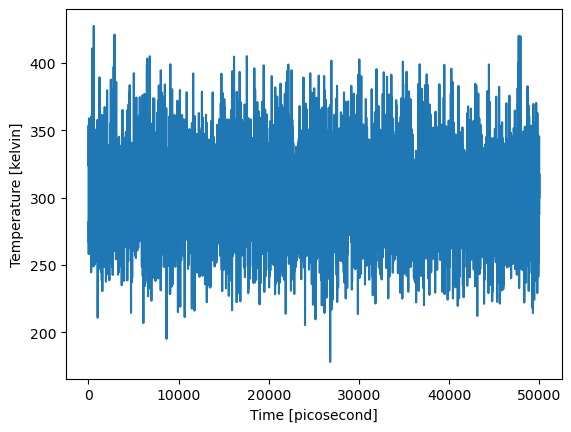

In [13]:
import matplotlib.pyplot as plt
import pyunitwizard as puw
import numpy as np

times = puw.concatenate(times)
temperatures = puw.concatenate(temperatures)

plt.plot(times, temperatures)
plt.xlabel(f'Time [{puw.get_unit(times)}]')
plt.ylabel(f'Temperature [{puw.get_unit(temperatures)}]')
plt.show()

The iterator includes some useful input arguments such as `selection` or `structure_indices`:

In [14]:
iterator = msm.Iterator(molecular_system, selection='group_index==3 and atom_name=="CA"',
                        structure_indices=[100, 110, 120], time=True, coordinates=True)

In [15]:
for time, coordinates in iterator:
    print(time, coordinates)

1010.0 picosecond [[[0.9690295457839966 1.146891474723816 -0.1522401124238968]]] nanometer
1110.0 picosecond [[[1.023858666419983 1.377505898475647 0.03329920768737793]]] nanometer
1210.0 picosecond [[[0.9038813710212708 1.1570117473602295 0.03575613722205162]]] nanometer


And four iteration control arguments: `start`, `stop`, `step` and `chunk`.

In [16]:
iterator = msm.Iterator(molecular_system, start=500, stop=510, step=2, structure_id=True)

In [17]:
for structure_id in iterator:
    print(structure_id)

500
502
504
506
508


Let's see two other examples on how to use these arguments:

In [18]:
iterator = msm.Iterator(molecular_system, start=500, stop=520, step=2, chunk=5, structure_id=True)

for structures_id in iterator:
    print(structures_id)

[500, 502, 504, 506, 508]
[510, 512, 514, 516, 518]


In [19]:
my_structure_indices = [1000, 1013, 1021, 1034, 1055, 1067, 1084, 1093, 1105]

iterator = msm.Iterator(molecular_system, structure_indices=my_structure_indices,
                        start=2, step=2, chunk=2, structure_id=True)

for structures_id in iterator:
    print(structures_id)

[1021 1055]
[1084 1105]


Finally, if no attribute is given to {class}`molsysmt.basic.Iterator`, a molecular system is returned in every iteration with the structural attributes updated.

In [20]:
iterator = msm.Iterator(molecular_system, start=1000, stop=1006, chunk=3)

In [ ]:
for aux_molecular_system in iterator:
    print(si)
    time, box_volume = msm.get(aux_molecular_system, time=True, box_volume=True)
    print(time, box_volume)

In this former case the output form was required by default as 'molsysmt.MolSys', but it can be change with the input argument `output_form`.

In [ ]:
msm.info(aux_molecular_system)

```{admonition} See also
:class: attention
{func}`molsysmt.basic.Iterator`, {func}`molsysmt.basic.get`
```